
# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORTING THE DATASET

In [3]:
train = pd.read_csv('titanic_train.csv')

# LOADING THE DATASET

In [4]:
# Getting the first five rows of the dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

<AxesSubplot:>

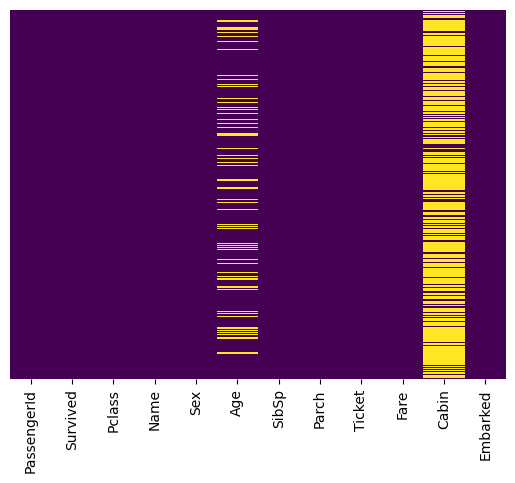

In [5]:
# Plotting the heatmap to find out the null values in each column

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

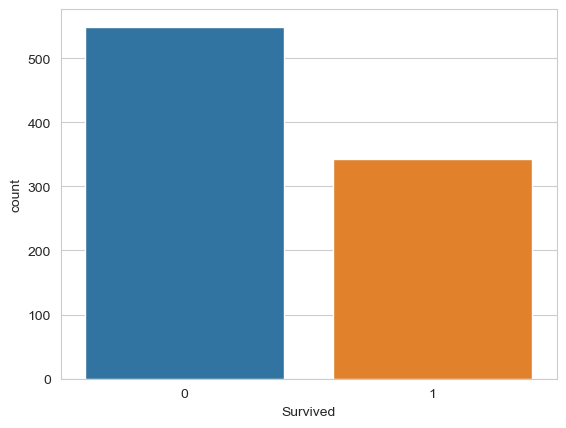

In [6]:
# Graphical representation of people who survived and who did not

sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

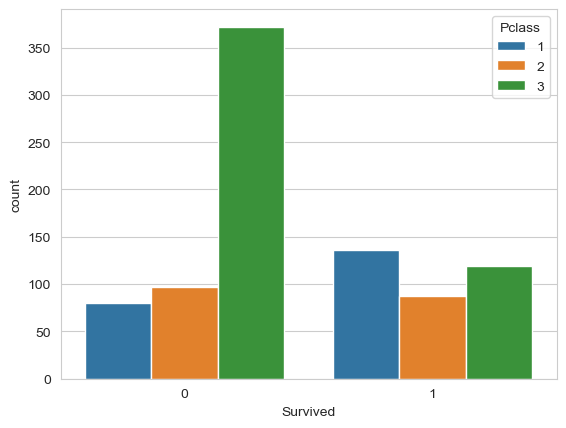

In [7]:
# Graphical representation of survivals based on passenger ticket class

sns.countplot(x='Survived', hue='Pclass', data=train)

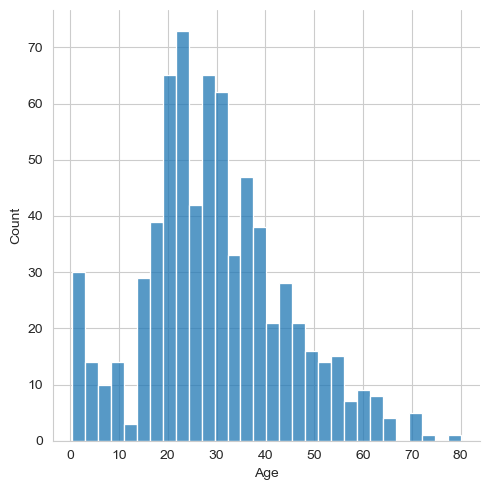

In [8]:
# Plotting a distribution of ages in the ship

sns.displot(train['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

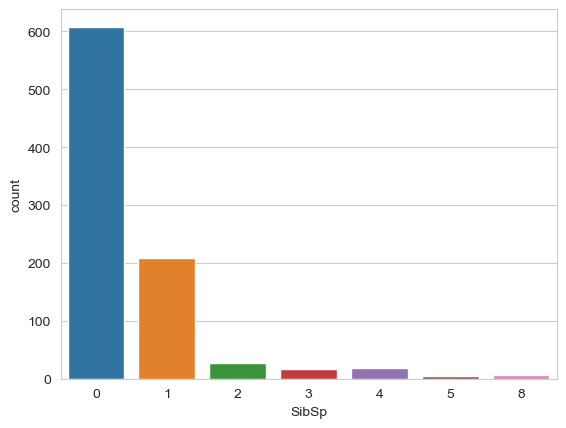

In [9]:
# Graphical representation of passengers with siblings and spouses

sns.countplot(x='SibSp', data=train)

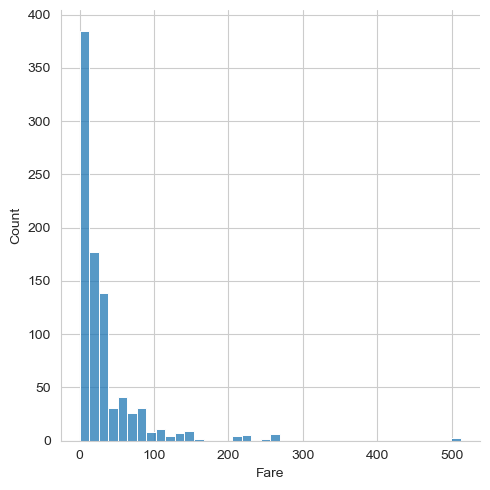

In [10]:
# Plotting a distribution of the fare

sns.displot(x='Fare', data=train, bins=40)

# Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

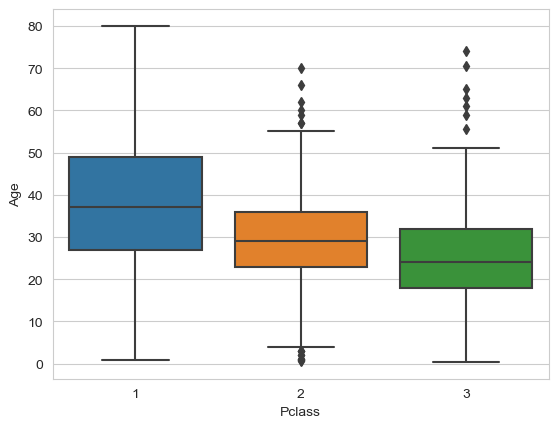

In [11]:
# Plotting a boxplot of Passengers ticket class against Age

sns.boxplot(x='Pclass',y='Age', data=train)

In [12]:
# Defining a function to fill in missing age data instead of just dropping the missing age data rows

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [13]:
# Applying the fuction defined

train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

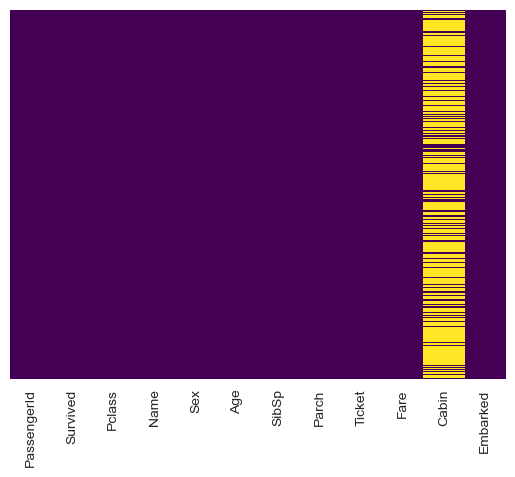

In [14]:
# Checking the map again, to find out null values

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
# Let's go ahead and drop the Cabin column

train.drop(['Cabin'], axis=1, inplace=True)

In [16]:
# Let's go ahead and drop any other null value

train.dropna(inplace=True)

# Converting Categorical Features

In [17]:
# Converting categorical features to dummy variables so our ML algorithm would be able to directly take in those features as inputs.

sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [18]:
# Concatinating the new dummy variables to the existing columns

train = pd.concat([train,sex,embark],axis=1)

In [19]:
# Loading first two rows of the dataset to see the new columns created

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [20]:
# Dropping unwanted columns in the table

train.drop(['PassengerId', 'Name','Sex','Ticket','Embarked'], axis=1, inplace=True)

In [21]:
# Loading the first five rows to see the columns we have left

train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Training and Prediction

In [22]:
# importing our train_test_split model

from sklearn.model_selection import train_test_split

In [23]:
# splitting our dataset

X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
# importing our logistic regression model

from sklearn.linear_model import LogisticRegression

In [25]:
# Training the model

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\DX\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting Test Data

In [26]:
predictions = logmodel.predict(X_test)
act_pred = pd.DataFrame({'Actual value': y_test, 'Predicted value':predictions})
act_pred

,Actual value,Predicted value
511,0,0
613,0,0
615,1,1
337,1,1
718,0,0
...,...,...
792,0,0
828,1,0
732,0,0
669,1,1


# Evaluating the Model

In [27]:
# Import the classification report and confusion matrix metrics

from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(confusion_matrix(y_test,predictions))

[[147  16]
 [ 30  74]]


In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

